# Assignment - 2: Solution
#### (Intermediate - Advanced)

This is the second assignment of DPhi 5 Week Data Science Bootcamp that revolves aroung Exploratory Data Analysis on the Covid_19 dataset

Recommended to go through the dataset description here: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset. We have used the dataset named 'covid_19_data.csv' file.

Note: To solve these questions please load the data from here: https://raw.githubusercontent.com/dphi-official/Datasets/master/covid_19_data.csv because the data at kaggle is updated everyday using which might lead to get you wrong answers for this particular assignment.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/covid_19_data.csv")

In [ ]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40805 entries, 0 to 40804
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              40805 non-null  int64  
 1   ObservationDate  40805 non-null  object 
 2   Province/State   22790 non-null  object 
 3   Country/Region   40805 non-null  object 
 4   Last Update      40805 non-null  object 
 5   Confirmed        40805 non-null  float64
 6   Deaths           40805 non-null  float64
 7   Recovered        40805 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.5+ MB


Information about the dataset:

There are 8 features:

* SNo: Serial number
* ObservationDate: Date of observation of the cases (format: MM/DD/YYYY)
* Province/State: Province or State of the country where cases were observed
* Country/Region: Country where cases were observed
* Last Update: Time in UTC at which the row is updated for the given province or country. (It is not in a standard format)
* Confirmed: Cumulative number of confirmed cases till the date
* Deaths: Cumulative number of deaths till the date
* Recovered: Cumulative number of recovered cases till date

**Instruction for the learner:** 
* Recommended to revise 'groupby()' method of pandas
* Recommended to understand the word **'Cummulative'** properly for three features - 'Confirmed', 'Recovered' and 'Deaths'.
* Please note that the dtype of datetime columns are of object, convert them to datetime as shown below:

In [ ]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data['Last Update'] = pd.to_datetime(data['Last Update'])

In [ ]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


**Question 1**

Which of the following is correct month of median observation date?

1. January
2. March
3. April
4. May       (correct answer)

**Solution code:**

In [ ]:
data['ObservationDate'].quantile(.5)    # Median is nothing but the second quantile or the 50th percentile

Timestamp('2020-05-01 00:00:00')

**Question 2**

Create a subset of your data, only taking observations which was **last updated** on **2020-06-13 03:33:14** and name this dataframe as updated_data. Select the correct statement about this dataframe i.e. **updated_data**?

1. There are 729 observations / records
2. There are 190 unique country's records available in the dataframe
3. There are 223 unique country's records available in the dataframe.
4. This dataset doesn't have any missing values.

Correct Anwers: 1, 2

**Solution code:**

check option 1

In [ ]:
updated_data = data[data['Last Update'] == "2020-06-13 03:33:14"]   # Get the observations on last updated date 2020-06-13 03:33:14 using subsetting a dataframe

In [ ]:
len(updated_data)    # get the length of the dataframe i.e. the number of observations in the dataframe updated_data

729

check option 2 and 3

In [ ]:
len(updated_data['Country/Region'].unique())    # Get the unique countries in the dataframe and the number of unique values using len()

190

check option 4

In [ ]:
updated_data.isnull().sum()   # get the total number of missing values in each column

SNo                  0
ObservationDate      0
Province/State     169
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

**Question 3**

Create a subset of data from the dataframe **updated_data**, only taking the top 10 countries which have the maximum number of confirmed cases with features - **'Country/Region', 'Confirmed', 'Deaths' and 'Recovered'**. Name this dataframe as 'top_10'. Which of the following countries are not present in the dataframe 'top_10'.

1. Germany
2. Iran
3. India
4. Spain
5. Peru
6. Chile 
7. Mexico
8. Pakistan
9. USA
10. UK

Correct answers: 2, 6, 7, 8

**Question 4**

Which country has the lowest number of confirmed cases among the ten countries in top_10 dataframe?

1. Germany
2. France
3. India
4. UK

Correct answer: 1

**Solution code:** for question 3 and 4

use groupby() to group all the observations with same country, sum all the observations and then sort the dataframe by confirmed cases.

In [ ]:
top_10 = updated_data[['Country/Region', 'Confirmed','Recovered','Deaths']].groupby('Country/Region').sum().sort_values(by = 'Confirmed', ascending = False)[:10]
top_10

,Confirmed,Recovered,Deaths
Country/Region,,,
US,2048986.0,547386.0,114669.0
Brazil,828810.0,445123.0,41828.0
Russia,510761.0,268862.0,6705.0
India,297535.0,147195.0,8498.0
UK,294402.0,1282.0,41566.0
Spain,243209.0,150376.0,27136.0
Italy,236305.0,173085.0,34223.0
Peru,214788.0,107133.0,6088.0
France,193220.0,72695.0,29377.0


**Question 5**

Add two columns in top_10 dataframe - 'Recovered_percentage' and 'Deaths_percentage' where, 

'Recovered_percentage' = (Recovered cases / Confirmed cases) * 100

'Death_percentage' = (Deaths cases / Confirmed cases) * 100

Among these 10 countries which country has the highest recovery percent?

1. India
2. Italy
3. Spain
4. Germany

correct answer: 4

**Solution code:**

In [ ]:
top_10['Recovered_percentage'] = top_10['Recovered'] / top_10['Confirmed'] * 100    # calculating recovered percentage
top_10['Deaths_percentage'] = top_10['Deaths'] / top_10['Confirmed'] * 100    # calculating deaths percentage

In [ ]:
top_10.Recovered_percentage.sort_values(ascending = False)    # sort values of recovery percentage in descending order

Country/Region
Germany    91.619220
Italy      73.246440
Spain      61.829949
Brazil     53.706278
Russia     52.639493
Peru       49.878485
India      49.471491
France     37.622917
US         26.714970
UK          0.435459
Name: Recovered_percentage, dtype: float64

**Question 6**

Among the ten countries in top_10 dataframe, which country has the lowest death percentage?

1. India
2. UK
3. USA
4. Germany
5. Russia

correct answer: 5

**Solution code:**

In [ ]:
top_10.Deaths_percentage.sort_values()    # sort deaths percentage in increading order

Country/Region
Russia      1.312747
Peru        2.834423
India       2.856135
Germany     4.691122
Brazil      5.046754
US          5.596378
Spain      11.157482
UK         14.118790
Italy      14.482554
France     15.203913
Name: Deaths_percentage, dtype: float64

**Question 7**

Create a subset of data from the initially loaded data i.e. the datafram **'data'**, which should include the day wise observations of country 'Germany' only with features - **'ObservationDate', 'Confirmed', 'Recovered', 'Deaths'**. Name this dataframe as 'Germany_data'. From the dataset 'Germany_data', what does it look like?
[Note: Here you need graphs to visualize]

1. The rate of confirmed cases and the rate of recovered cases are going parallel to each other.
2. The rate of recovered cases is more than the rate of confirmed cases.

Correct answer: 1

**Solution code:**

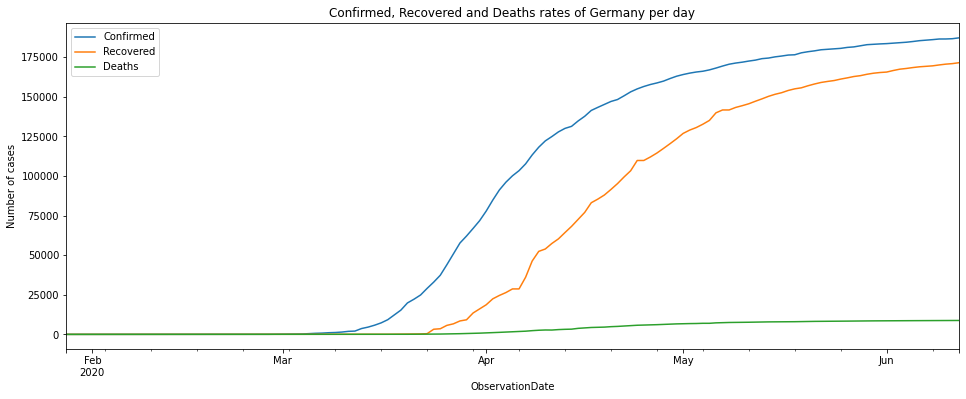

In [ ]:
# Getting daywise information for Germany
Germany_day_wise = data[data['Country/Region'] == 'Germany'][['ObservationDate', 'Confirmed', 'Recovered', 'Deaths']].groupby('ObservationDate').sum().sort_values(by = 'ObservationDate',
                                                                                ascending = True)

# plot the graphs for recovered, confirmed and deaths cases 
Germany_day_wise.plot(figsize = (16,6))
plt.title("Confirmed, Recovered and Deaths rates of Germany per day")
plt.ylabel("Number of cases")
plt.show()

As it can be seen the graphs confirmed cases and recovered cases are nearly parallel to each other

**Question 8**

Take the help of the dataframe 'updated_data' to get the total confirmed, recovered and deaths cases worldwide. Choose the correct option

1. Confirmed cases worldwide is 7632802.
2. Recovered cases worldwide is 3613277.
3. Total number of deaths worldwide is 425394.

Correct answer: 1, 2, 3

**Solution code:**

In [ ]:
updated_data[['Confirmed', 'Recovered', 'Deaths']].sum()   # updated_data has total confirmed recoverd and deaths cases country wise. using sum() will add all those values in each column which is nothing but worldwide data

Confirmed    7632802.0
Recovered    3613277.0
Deaths        425394.0
dtype: float64

**Question 9**

Get the data of USA from the dataframe 'updated_data', group the data state/province wise. Which of the following information is correct about Province/State of USA?

1. New York has the highest number of confirmed cases.
2. Massachusetts has the 5th highest number of confirmed cases.

correct answers: 1, 2

**Solution code:**

In [ ]:
# USA data
USA_data = updated_data[updated_data['Country/Region'] == 'US']    # get USA data only 

In [ ]:
# group by state
USA_data_by_state = USA_data[['Province/State', 'Confirmed', 'Recovered', 'Deaths']].groupby('Province/State').sum().sort_values(
                                                                                by = 'Confirmed',
                                                                                ascending = False)

In [ ]:
USA_data_by_state['Confirmed'].sort_values(ascending = False)  # sort the values in descending order

Province/State
New York                        381714.0
New Jersey                      166164.0
California                      146659.0
Illinois                        131198.0
Massachusetts                   105059.0
Texas                            84927.0
Pennsylvania                     82481.0
Florida                          70971.0
Michigan                         65672.0
Maryland                         60613.0
Georgia                          55783.0
Virginia                         53211.0
Louisiana                        44995.0
Connecticut                      44689.0
North Carolina                   41417.0
Ohio                             40424.0
Indiana                          39146.0
Arizona                          33039.0
Minnesota                        29795.0
Tennessee                        29118.0
Colorado                         28807.0
Washington                       25171.0
Alabama                          23710.0
Iowa                             23350.0
W